## Introduction to Deep Learning Architecture

# Imports

In [31]:
import pandas as pd
from tensorflow import keras
import requests

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Perceptron

## Instance

In [12]:
model = keras.Sequential(
    [keras.layers.Dense(units=1, input_shape=[2])],
    name='perceptron'
)

/home/marcos/Documents/pro/deep_learning/dl_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model

<Sequential name=perceptron, built=True>

## Parâmeters

In [14]:
model.summary()

Model: "perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

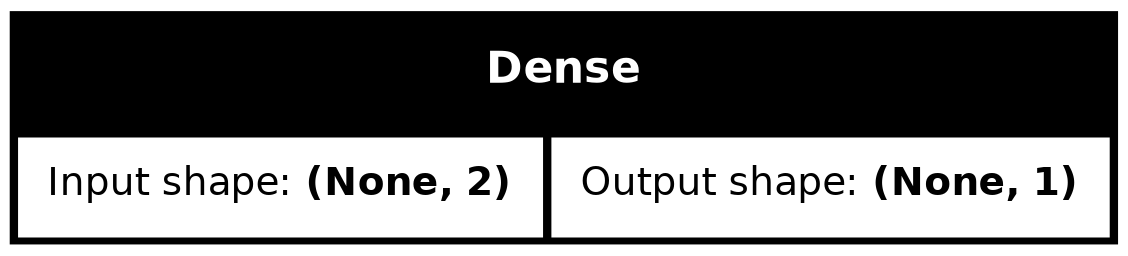

In [15]:
keras.utils.plot_model(model, show_shapes=True)

In [16]:
pesos, bias = model.layers[0].get_weights()

In [10]:
pesos

array([[ 1.4018594],
       [-0.5033291]], dtype=float32)

In [11]:
bias

array([0.], dtype=float32)

## Instance with Initializer

In [25]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[2], name='perceptron',
    kernel_initializer=keras.initializers.RandomNormal(),
    bias_initializer=keras.initializers.Ones())]
)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ perceptron (Dense)              │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.layers[0].get_weights()

[array([[ 0.02048174],
        [-0.0150851 ]], dtype=float32),
 array([1.], dtype=float32)]

# Data

In [5]:
X, y = datasets.load_iris(return_X_y=True)

In [7]:
datasets.load_iris()['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
datasets.load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

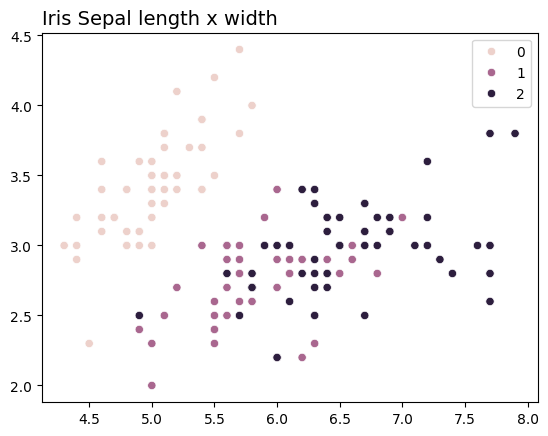

In [22]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.title('Iris Sepal length x width', loc='left', fontsize=14)
plt.show()

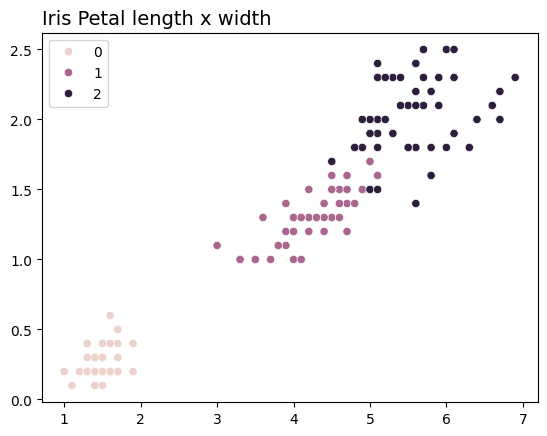

In [24]:
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y)
plt.title('Iris Petal length x width', loc='left', fontsize=14)
plt.show()

# Preprocessing

## OneHot

In [26]:
y_ohe = keras.utils.to_categorical(y)

In [27]:
y_ohe.shape

(150, 3)

## Norm

In [30]:
mms = MinMaxScaler()

X_mms = mms.fit_transform(X)

# Model

## Train/ test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_mms, y_ohe, test_size=0.2, stratify=y, random_state=7)

In [37]:
X_train.shape

(120, 4)

In [38]:
X_test.shape

(30, 4)

## MLP

In [49]:
# Train function -> relu
# Classification fuction -> softmax
model = keras.Sequential([
    keras.layers.InputLayer(shape=[4,], name='input'),
    keras.layers.Dense(100, activation='relu', name='hidden_1', kernel_initializer=keras.initializers.RandomNormal(seed=7)),
    keras.layers.Dense(3, activation='softmax', name='output')
])

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

### Train

In [58]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['F1Score'])

In [59]:
history = model.fit(x=X_train, y=y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - F1Score: 0.2541 - loss: 1.0902 - val_F1Score: 0.5299 - val_loss: 1.0600
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - F1Score: 0.5305 - loss: 1.0616 - val_F1Score: 0.5641 - val_loss: 1.0385
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - F1Score: 0.5594 - loss: 1.0379 - val_F1Score: 0.5641 - val_loss: 1.0223
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - F1Score: 0.5628 - loss: 1.0239 - val_F1Score: 0.5641 - val_loss: 1.0080
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - F1Score: 0.5705 - loss: 1.0056 - val_F1Score: 0.5641 - val_loss: 0.9945
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - F1Score: 0.5339 - loss: 1.0020 - val_F1Score: 0.5641 - val_loss: 0.9807
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - F1Score: 0.5552 - loss: 0.9807 - val_F1Score: 0.5641 - val_loss: 0.9675
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - F1Score: 0.5514 - loss: 0.9704 - val_F1Score: 0.5641 - val_loss: 0.9540
Epoch 9

### Evaluation

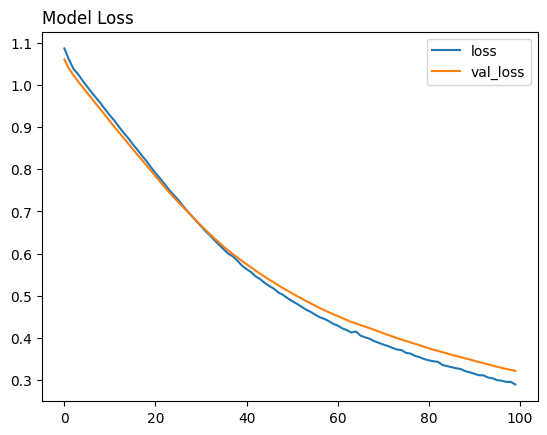

In [64]:
pd.DataFrame(history.history).plot()
plt.title('Model Loss', loc='left')
plt.show()

In [79]:
# 'val_F1Scor
history.params

{'verbose': 'auto', 'epochs': 100, 'steps': 3}

### Test

In [80]:
model.evaluate(x=X_test, y=y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - F1Score: 1.0000 - loss: 0.2840


[0.2839929461479187,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>]